# Deep Learning Just Works &trade;

So, let's train a significantly better model for image recongition.  We will use a Convolutional Neural Network (CNN) instead of a plain MLP.


First, load the data in a more appropriate format (do not flatten into vectors):

In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten
from keras.optimizers import Adam
%matplotlib inline


# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)



### Going Deeper with Convolutions

Define and train a simple CNN:


In [8]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

results = model.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=2,
          validation_data=(x_test, y_test))

Epoch 1/30


I0000 00:00:1727954083.238075 2355042 service.cc:146] XLA service 0x7b1600005030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727954083.238096 2355042 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-10-03 14:14:43.259454: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-03 14:14:43.374292: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-03 14:14:43.406361: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibil

235/235 - 8s - 34ms/step - accuracy: 0.9404 - loss: 0.2012 - val_accuracy: 0.9860 - val_loss: 0.0491
Epoch 2/30
235/235 - 1s - 3ms/step - accuracy: 0.9864 - loss: 0.0445 - val_accuracy: 0.9882 - val_loss: 0.0360
Epoch 3/30
235/235 - 1s - 3ms/step - accuracy: 0.9906 - loss: 0.0297 - val_accuracy: 0.9869 - val_loss: 0.0437
Epoch 4/30
235/235 - 1s - 3ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9904 - val_loss: 0.0300
Epoch 5/30
235/235 - 1s - 3ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9919 - val_loss: 0.0292
Epoch 6/30
235/235 - 1s - 3ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9915 - val_loss: 0.0278
Epoch 7/30
235/235 - 1s - 3ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9918 - val_loss: 0.0289
Epoch 8/30
235/235 - 1s - 3ms/step - accuracy: 0.9974 - loss: 0.0090 - val_accuracy: 0.9916 - val_loss: 0.0293
Epoch 9/30
235/235 - 1s - 3ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.9909 - val_loss: 0.0306
Epoch 10/30

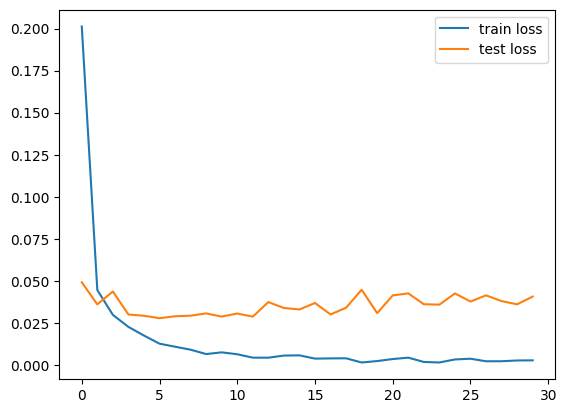

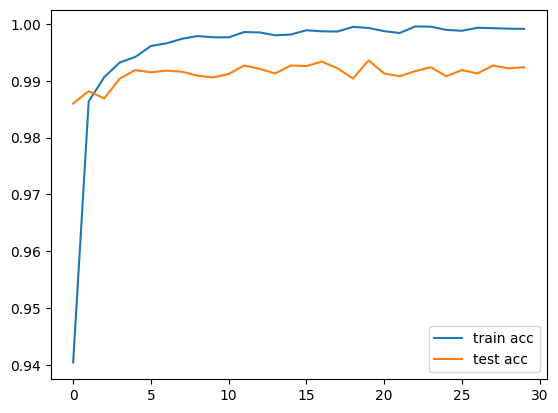

In [9]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train acc', 'test acc'])

Quite impressive! 0.62% error, even without any form of explicit regularization!

In [10]:
print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100- model.evaluate(x_test, y_test, batch_size=128)[1]*100)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9993 - loss: 0.0027
Train error (%):  0.06833076477050781
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0527
Test error (%):  0.7600009441375732
